# load package

In [2]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import numpy as np

## read dataset

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

### structure of data

In [6]:
X.shape
# 16 columns and 45211 rows

(45211, 16)

In [11]:
print(X.dtypes)

age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
dtype: object


In [12]:
X.isnull().sum()
#  a lot of null values

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [61]:
x_filtered = X.dropna()
x_filtered.head()


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure


In [62]:
x_filtered.shape

(7842, 16)

## drop dependend variable

In [63]:
# we can use the numberic values only

x_filtered = x_filtered.select_dtypes(include="int64")
x_filtered.head()

# we only taking integer for this analysis

,age,balance,day_of_week,duration,campaign,pdays,previous
24060,33,882,21,39,1,151,3
24062,42,-247,21,519,1,166,1
24064,33,3444,21,144,1,91,4
24072,36,2415,22,73,1,86,4
24077,36,0,23,140,1,143,3


# correlation between variables

In [21]:
correlation_matrix = x_filtered.corr()
correlation_matrix
# we found the correlation of each variable against each other

,age,balance,day_of_week,duration,campaign,pdays,previous
age,1.000000,0.117283,0.015385,0.058902,0.000736,-0.106095,0.003396
balance,0.117283,1.000000,0.048348,0.040550,-0.011874,-0.101847,0.001708
day_of_week,0.015385,0.048348,1.000000,-0.006615,-0.028473,-0.090031,-0.016000
duration,0.058902,0.040550,-0.006615,1.000000,-0.094348,-0.009571,-0.001776
campaign,0.000736,-0.011874,-0.028473,-0.094348,1.000000,0.063530,0.137044
pdays,-0.106095,-0.101847,-0.090031,-0.009571,0.063530,1.000000,-0.026708
previous,0.003396,0.001708,-0.016000,-0.001776,0.137044,-0.026708,1.000000


## calculate eigen values

In [24]:
eigenvalues, _ = np.linalg.eig(correlation_matrix)
print("eigen values", eigenvalues)

eigen values [1.28296068 1.14723723 0.79635045 1.03358302 0.95524906 0.87819339
 0.90642616]


# draw screeplot

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

Text(0, 0.5, 'eigen values')

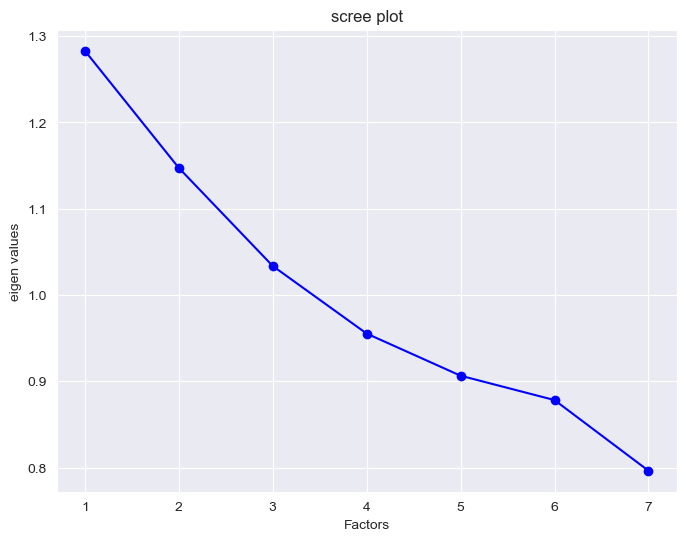

In [50]:
sorted_eigen_values = sorted(eigenvalues, reverse=True)

plt.figure(figsize=(8, 6))
plt.plot(range(1,len(sorted_eigen_values)+1), sorted_eigen_values, marker="o", color="blue")
plt.title("scree plot")
plt.xlabel("Factors")
plt.ylabel("eigen values")

## unrotated factor matrix

In [64]:
n_factor = 5
fa = FactorAnalyzer(n_factor, rotation=None)
fa.fit(x_filtered)

FactorAnalyzer(n_factors=5, rotation=None, rotation_kwargs={})

In [65]:
unrotated_factor_matrix = fa.loadings_
unrotated_factor_matrix

array([[ 0.29753732,  0.19699379,  0.17853535,  0.15888071, -0.05168433],
       [ 0.24923521,  0.13946041,  0.04371015,  0.0714882 ,  0.0679323 ],
       [ 0.15895883,  0.03918054, -0.17096468, -0.00438036,  0.16265813],
       [ 0.18007011, -0.07832638,  0.26415589, -0.14149076,  0.07603972],
       [-0.30648573,  0.37678853,  0.01102355,  0.11473725,  0.04836477],
       [-0.38367706, -0.18404083,  0.19470364,  0.08382171,  0.07270514],
       [-0.12012751,  0.33820096,  0.05263895, -0.23649898, -0.01345966]])

# rotated factor matix

In [66]:
n_factor = 5
rotation_method = 'varimax'   # orthogonal rotation
fa = FactorAnalyzer(n_factor, rotation=rotation_method)
fa.fit(x_filtered)
rotated_factor_matrix = fa.loadings_
rotated_factor_matrix

array([[ 0.00550718,  0.42479113,  0.05772835, -0.0560729 , -0.01302537],
       [ 0.00788344,  0.26620583,  0.05432914, -0.04843773,  0.13029878],
       [-0.0281877 ,  0.03908694, -0.01375972, -0.05949151,  0.27651021],
       [-0.01349265,  0.09120675,  0.35386423,  0.00793272, -0.01888726],
       [ 0.35139785,  0.0616992 , -0.27625065,  0.21456315, -0.04346718],
       [-0.03357264, -0.20750765,  0.00509287,  0.37288165, -0.21919748],
       [ 0.42938525, -0.00672555,  0.01296941, -0.05062274, -0.02337746]])

# rotated factor matrix

In [67]:
factor_correlation_matrix = np.corrcoef(rotated_factor_matrix.T)
factor_correlation_matrix

array([[ 1.        , -0.16995902, -0.52647961,  0.01430325, -0.18295593],
       [-0.16995902,  1.        ,  0.15278763, -0.66799505,  0.3886782 ],
       [-0.52647961,  0.15278763,  1.        , -0.37483132,  0.02325555],
       [ 0.01430325, -0.66799505, -0.37483132,  1.        , -0.73595133],
       [-0.18295593,  0.3886782 ,  0.02325555, -0.73595133,  1.        ]])

# transformation of variables

In [69]:
factor_scores = np.dot(x_filtered, rotated_factor_matrix)
factor_scores

array([[   2.58686287,  221.89740294,   63.8667662 ,   10.855394  ,
          86.35137796],
       [ -14.10281072,  -34.14577689,  172.95400793,   74.53911375,
         -73.18026414],
       [  23.81125722,  925.93717208,  239.92115795, -134.83265738,
         431.32215621],
       ...,
       [  20.78642277,  809.43045016,  265.00878388, -126.04754545,
         360.43677486],
       [  26.63276132, 1617.51265917,  712.8132733 , -203.39888406,
         686.51461572],
       [  17.38981221,  801.24287697,  291.60650856,  -74.15681141,
         342.96489129]])